In [41]:
from sklearn.datasets import make_moons

data = make_moons(n_samples=10000, noise=0.4)
data

(array([[ 0.08808569,  0.92899992],
        [ 0.51082636, -0.4150565 ],
        [ 1.90027413, -0.96496878],
        ...,
        [ 0.90594495, -0.30691193],
        [ 1.074343  , -0.33193169],
        [ 1.09044366,  1.14540953]]),
 array([1, 1, 1, ..., 1, 1, 0]))

In [42]:
X = data[0]
y = data[1]

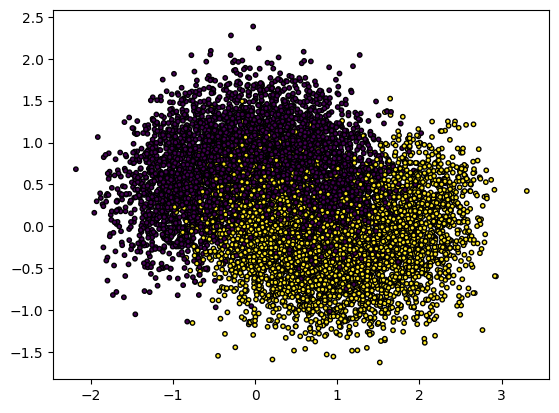

In [43]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=10, edgecolors="k")

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

busca = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10,
                    param_grid={"max_depth": [6,7,8,10,25], "max_leaf_nodes": [19,18,17,16,15,10], })

busca.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [6, 7, ...], 'max_leaf_nodes': [19, 18, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [46]:
tree_clf = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=18)
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,18
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = tree_clf.predict(X_train)
y_pred_val = tree_clf.predict(X_test)

print(" Treino -- Acuracia: ", accuracy_score(y_train, y_pred), "F1: ", f1_score(y_train,y_pred))
print("Validação -- Acuracia: ", accuracy_score(y_test, y_pred_val), "F1: ", f1_score(y_test,y_pred_val))

 Treino -- Acuracia:  0.8678571428571429 F1:  0.865219291854874
Validação -- Acuracia:  0.8646666666666667 F1:  0.8628378378378379


In [48]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1000, test_size=0.3, train_size=100)

In [49]:
value = 0
count = 0
for train_index, test_index in split.split(X_train, y_train):
    tree_clf.fit(X_train[train_index], y_train[train_index])
    
    y_temp = tree_clf.predict(X_test)
    value += accuracy_score(y_test, y_temp)
    count += 1
    
print("Acuracia média :", value/count)

Acuracia média : 0.7977616666666667


In [50]:
import numpy as np
value = 0
count = 0
import scipy
guardar = []
for train_index, test_index in split.split(X_train, y_train):
    tree_clf.fit(X_train[train_index], y_train[train_index])
    
    y_temp = tree_clf.predict(X_test)
    guardar.append(y_temp)

matriz = np.array(guardar)
matriz = matriz.T

y_pred = scipy.stats.mode(matriz, axis=1).mode

accuracy_score(y_test, y_pred)

0.867